# **Analysis of Clusters**

This file is made to analyze the results of our cluster analysis and ultimately identify the archetypes we will be using in our analysis of both the MAC and Miami in particular.

## **Data Preparation**

Filter data and create useful objects to evaluate and identify clusters by common statistics

In [30]:
# Import the necessary library to read in csv file
import pandas as pd

# Import data
data = pd.read_csv("MAC_masterstats_cluster.csv")
# Check structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 1 to 1041
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         1041 non-null   object 
 1   Player         1041 non-null   object 
 2   Team           1041 non-null   object 
 3   Pos            1041 non-null   object 
 4   G              1041 non-null   int64  
 5   GS             1041 non-null   int64  
 6   MP             1041 non-null   float64
 7   FG             1041 non-null   float64
 8   FGA            1041 non-null   float64
 9   FG%            1041 non-null   float64
 10  3P             1041 non-null   float64
 11  3PA            1041 non-null   float64
 12  3P%            1041 non-null   float64
 13  2P             1041 non-null   float64
 14  2PA            1041 non-null   float64
 15  2P%            1041 non-null   float64
 16  eFG%           1041 non-null   float64
 17  FT             1041 non-null   float64
 18  FTA          

In [31]:
# Look at the data as it is initially
data.head().T

,1,2,3,4,5
Season,2024/25,2024/25,2024/25,2024/25,2024/25
Player,chansey willis,jalen terry,quentin jones,marcus johnson,ugnius jarusevicius
Team,Western Michigan,Eastern Michigan,Northern Illinois,Bowling Green,Central Michigan
Pos,G,G,G,F,F
G,24,31,31,32,26
GS,24,31,31,32,24
MP,32.0,37.5,35.4,31.4,26.7
FG,6.0,5.7,5.7,5.7,5.3
FGA,14.0,12.8,12.6,13.2,10.0
FG%,0.424,0.448,0.455,0.43,0.537


In [32]:
# Filter data for each cluster
cluster1 = data[data['Cluster'] == 1]
cluster2 = data[data['Cluster'] == 2]
cluster3 = data[data['Cluster'] == 3]
cluster4 = data[data['Cluster'] == 4]
cluster5 = data[data['Cluster'] == 5]

In [33]:
# From each cluster, extact the count of each 'Position' present
cluster1_pos = cluster1['Pos'].value_counts()
cluster2_pos = cluster2['Pos'].value_counts()
cluster3_pos = cluster3['Pos'].value_counts()
cluster4_pos = cluster4['Pos'].value_counts()
cluster5_pos = cluster5['Pos'].value_counts()

# Print the output
print(cluster1_pos)
print(cluster2_pos)
print(cluster3_pos)
print(cluster4_pos)
print(cluster5_pos)

Pos
G    170
F     47
C      2
Name: count, dtype: int64
Pos
F    79
C    45
G     4
Name: count, dtype: int64
Pos
F    148
G     30
C     24
Name: count, dtype: int64
Pos
G    227
F     57
C      2
Name: count, dtype: int64
Pos
G    196
F     10
Name: count, dtype: int64


In [34]:
# Create a formatted table including all of the clusters
# Number of players by position per cluster
cluster_pos_counts = {
    0: {'G': 170, 'F': 47, 'C': 2},
    1: {'G': 4, 'F': 79, 'C': 45},
    2: {'G': 30, 'F': 148, 'C': 24},
    3: {'G': 227, 'F': 57, 'C': 2},
    4: {'G': 196, 'F': 10, 'C': 0}
}

# Convert to DataFrame for easy formatting
pos_table = pd.DataFrame(cluster_pos_counts).T

# Rename indexes beginning with 1 instead of 0
pos_table.index = pos_table.index.map(lambda x: x + 1)

# Format to make the numbers more readable
pos_table = pos_table.astype(int)  # Ensure integer formatting

# Display the formatted table
pos_table

,G,F,C
1,170,47,2
2,4,79,45
3,30,148,24
4,227,57,2
5,196,10,0


In [35]:
# Make a copy of each cluster dataframe without the object fields to calculate means
cluster1_copy = cluster1.select_dtypes(exclude=['object'])
cluster2_copy = cluster2.select_dtypes(exclude=['object'])
cluster3_copy = cluster3.select_dtypes(exclude=['object'])
cluster4_copy = cluster4.select_dtypes(exclude=['object'])
cluster5_copy = cluster5.select_dtypes(exclude=['object'])

In [36]:
# Make a table with the means for all fields for each cluster dataframe
cluster1_means = cluster1_copy.mean()
cluster2_means = cluster2_copy.mean()
cluster3_means = cluster3_copy.mean()
cluster4_means = cluster4_copy.mean()
cluster5_means = cluster5_copy.mean()

# Build a data frame holding only the means of each cluster
cluster_means = pd.concat([cluster1_means, cluster2_means, cluster3_means, cluster4_means, cluster5_means], axis=1)
cluster_means

,0,1,2,3,4
G,29.178082,29.929688,30.886139,30.629371,30.548544
GS,11.726027,16.046875,21.727723,18.944056,23.199029
MP,18.778082,18.370313,23.937129,25.135664,27.623301
FG,1.668493,2.372656,3.660396,3.172727,4.107282
FGA,4.305936,4.267969,7.547525,7.520629,9.564563
FG%,0.383790,0.552133,0.489619,0.419476,0.426340
3P,0.617808,0.015625,0.706931,1.480420,1.203398
3PA,2.004110,0.107813,2.100000,4.030420,3.505825
3P%,0.285224,0.033102,0.344054,0.361678,0.331417
2P,1.055708,2.359375,2.949505,1.699301,2.910194


## **Archetype Classification**

After looking at mean statistics, we are now going to take the most significant ones based on our observations to create more contextual names that better explain the roles of each cluster as they relate to the game of basketball, starting with cluster 1.

### **Cluster 1**

In [37]:
# Set labels for clusters as we analyze key statistics
cluster_labels = {
    0: "1",
    1: "2",
    2: "3",
    3: "4",
    4: "5"
}

# Extract relevant stats
table_1 = cluster_means.loc[['GS', 'MP', 'FGA', '3PA', '3P%', 'PtsPerMin', 'STLPerMin', 'Opp FG%']]

# Transpose so clusters are rows
table_1 = table_1.T

# Rename index to descriptive names
table_1.index = table_1.index.map(cluster_labels)

# Build a formatted table to better display the key stats for cluster 1
styled_table_1 = table_1.style.set_caption("Key Stats by Player Archetype Cluster") \
                          .format("{:.4f}") \
                          .highlight_max(axis=0, color='lightgreen') \
                          .highlight_min(axis=0, color='lightcoral')

styled_table_1

,GS,MP,FGA,3PA,3P%,PtsPerMin,STLPerMin,Opp FG%
1,11.7260,18.7781,4.3059,2.0041,0.2852,0.2462,0.0345,36.5479
2,16.0469,18.3703,4.2680,0.1078,0.0331,0.3117,0.0228,40.0938
3,21.7277,23.9371,7.5475,2.1000,0.3441,0.4049,0.0270,38.3431
4,18.9441,25.1357,7.5206,4.0304,0.3617,0.3637,0.0264,38.0570
5,23.1990,27.6233,9.5646,3.5058,0.3314,0.4202,0.0450,37.4447


As we can see, this first cluster is characterized by a few key statistics:

> An extremely low usage rate, shown by the low average minutes played per game and games started.

> A high three point shot rate relative to total field goals attempted.

> A high steals per minute and a low opponent field goal percentage, showing they tend to be above average defenders.

> We also see that almost 80% of this cluster consists of guards.

Therefore, we will name this cluster: **Bench 3&D Guard**

### **Cluster 2**

In [38]:
# Set labels for clusters as we analyze key statistics
cluster_labels = {
    0: "Bench 3&D Guard",
    1: "2",
    2: "3",
    3: "4",
    4: "5"
}

# Extract relevant stats
table_2 = cluster_means.loc[['TRB', 'ORB', 'BLK', 'FG%', '3PA', '3P%']]

# Transpose so clusters are rows
table_2 = table_2.T

# Rename index to descriptive names
table_2.index = table_2.index.map(cluster_labels)

# Build a formatted table to better display the key stats for cluster 1
styled_table_2 = table_2.style.set_caption("Key Stats by Player Archetype Cluster") \
                          .format("{:.4f}") \
                          .highlight_max(axis=0, color='lightgreen') \
                          .highlight_min(axis=0, color='lightcoral')

styled_table_2

,TRB,ORB,BLK,FG%,3PA,3P%
Bench 3&D Guard,2.5594,0.6658,0.1945,0.3838,2.0041,0.2852
2,4.7836,1.7422,0.7445,0.5521,0.1078,0.0331
3,5.6609,1.7178,0.7203,0.4896,2.1000,0.3441
4,3.0003,0.6808,0.1678,0.4195,4.0304,0.3617
5,3.5126,0.6985,0.2112,0.4263,3.5058,0.3314


As we can see, this cluster is characterized by a few key statistics:

> High quality rebounder and generally around the rim (High total rebounds per game, offensive rebounds per game, and blocks per game).

> Highly efficient (highest field goal percentage) scoring focused around the rim (low three point attempts per game and three point field goal percentage).

> Primarily forwards and centers, where this cluster consists of around 60% of centers in the dataset.

Therefore, we will name this cluster: **Interior Role Big**

### **Cluster 3**

In [39]:
# Set labels for clusters as we analyze key statistics
cluster_labels = {
    0: "Bench 3&D Guard",
    1: "Interior Role Big",
    2: "3",
    3: "4",
    4: "5"
}

# Extract relevant stats
table_3 = cluster_means.loc[['PTS', 'PtsPerMin', 'FG%', '3P%', 'TRB', 'BLK', 'STL', 'Opp FG%']]

# Transpose so clusters are rows
table_3 = table_3.T

# Rename index to descriptive names
table_3.index = table_3.index.map(cluster_labels)

# Build a formatted table to better display the key stats for cluster 1
styled_table_3 = table_3.style.set_caption("Key Stats by Player Archetype Cluster") \
                          .format("{:.4f}") \
                          .highlight_max(axis=0, color='lightgreen') \
                          .highlight_min(axis=0, color='lightcoral')

styled_table_3

,PTS,PtsPerMin,FG%,3P%,TRB,BLK,STL,Opp FG%
Bench 3&D Guard,4.7187,0.2462,0.3838,0.2852,2.5594,0.1945,0.6511,36.5479
Interior Role Big,6.1023,0.3117,0.5521,0.0331,4.7836,0.7445,0.4227,40.0938
3,9.9792,0.4049,0.4896,0.3441,5.6609,0.7203,0.6460,38.3431
4,9.4000,0.3637,0.4195,0.3617,3.0003,0.1678,0.6741,38.0570
5,11.9471,0.4202,0.4263,0.3314,3.5126,0.2112,1.2238,37.4447


As we can see, this cluster is characterized by a few key statistics:

> Offensive contributor, with the second highest average points per game and points per minute.

> Efficient players, with the second highest field goal and three point field goal percentages.

> Are versatile as players who can play around the rim (total rebounds per game and blocks per game) and who can spread the floor (three point field goal percentage).

> We can also observe that the vast majority of this cluster is forwards, with not nearly as many centers as in the previous cluster

Therefore, we will name this cluster: **Versatile Scoring Forward**

### **Cluster 4**

In [40]:
# Set labels for clusters as we analyze key statistics
cluster_labels = {
    0: "Bench 3&D Guard",
    1: "Interior Role Big",
    2: "Versatile Scoring Forward",
    3: "4",
    4: "5"
}

# Extract relevant stats
table_4 = cluster_means.loc[['PTS', 'PtsPerMin', '2PA', '3PA', '3P%', 'AST', 'BLK', 'STL', 'Opp FG%']]

# Transpose so clusters are rows
table_4 = table_4.T

# Rename index to descriptive names
table_4.index = table_4.index.map(cluster_labels)

# Build a formatted table to better display the key stats for cluster 1
styled_table_4 = table_4.style.set_caption("Key Stats by Player Archetype Cluster") \
                          .format("{:.4f}") \
                          .highlight_max(axis=0, color='lightgreen') \
                          .highlight_min(axis=0, color='lightcoral')

styled_table_4

,PTS,PtsPerMin,2PA,3PA,3P%,AST,BLK,STL,Opp FG%
Bench 3&D Guard,4.7187,0.2462,2.3032,2.0041,0.2852,0.9963,0.1945,0.6511,36.5479
Interior Role Big,6.1023,0.3117,4.1578,0.1078,0.0331,0.5555,0.7445,0.4227,40.0938
Versatile Scoring Forward,9.9792,0.4049,5.4436,2.1000,0.3441,1.0871,0.7203,0.6460,38.3431
4,9.4000,0.3637,3.4923,4.0304,0.3617,1.4094,0.1678,0.6741,38.0570
5,11.9471,0.4202,6.0587,3.5058,0.3314,3.2005,0.2112,1.2238,37.4447


As we can see, this cluster is characterized by a few key statistics:

> Offensive contributor, with the a solid average points per game and points per minute.

> Three point shooters, shown by their higher average three point field goals attempted per game compared to two pointers attempted per game and their high three point field goal percentage.

> Ball handlers, likely secondary given they rank second in assists and steals per game.

> Primarily guards, as this cluster contains the most guards out of any cluster.

Therefore, we will name this cluster: **Off-Ball Shooting Guard**

### **Cluster 5**

In [41]:
# Set labels for clusters as we analyze key statistics
cluster_labels = {
    0: "Bench 3&D Guard",
    1: "Interior Role Big",
    2: "Versatile Scoring Forward",
    3: "Off-Ball Shooting Guard",
    4: "5"
}

# Extract relevant stats
table_5 = cluster_means.loc[['MP', 'PTS', 'PtsPerMin', 'FGA', '3PA', '3P%', 'AST', 'TOV', 'STL', 'Opp FG%']]

# Transpose so clusters are rows
table_5 = table_5.T

# Rename index to descriptive names
table_5.index = table_5.index.map(cluster_labels)

# Build a formatted table to better display the key stats for cluster 1
styled_table_5 = table_5.style.set_caption("Key Stats by Player Archetype Cluster") \
                          .format("{:.4f}") \
                          .highlight_max(axis=0, color='lightgreen') \
                          .highlight_min(axis=0, color='lightcoral')

styled_table_5

,MP,PTS,PtsPerMin,FGA,3PA,3P%,AST,TOV,STL,Opp FG%
Bench 3&D Guard,18.7781,4.7187,0.2462,4.3059,2.0041,0.2852,0.9963,0.9511,0.6511,36.5479
Interior Role Big,18.3703,6.1023,0.3117,4.2680,0.1078,0.0331,0.5555,1.1250,0.4227,40.0938
Versatile Scoring Forward,23.9371,9.9792,0.4049,7.5475,2.1000,0.3441,1.0871,1.5054,0.6460,38.3431
Off-Ball Shooting Guard,25.1357,9.4000,0.3637,7.5206,4.0304,0.3617,1.4094,1.1413,0.6741,38.0570
5,27.6233,11.9471,0.4202,9.5646,3.5058,0.3314,3.2005,2.2558,1.2238,37.4447


As we can see, this cluster is characterized by a few key statistics:

> Offensive contributor, with the highest average points per game and points per minute.

> Three point shooters, shown by their high average three point field goals attempted relative to other clusters and a similarly relatively high three point field goal percentage.

> They also likely have high on-ball usage rates, given their high average field goals attempted per game, assists per game, and turnovers per game.

> They also seem to be high quality defenders, with the highest average steals per game and the second lowest average opponent field goal percentage.

> Once again, this cluster is aggresively primarily guards.

Therefore, we will name this cluster: **Two-Way Lead Guard**

### **Update Cluster Labels and Names in Context**

In [42]:
# Update cluster labels
cluster_labels = {
    0: "Bench 3&D Guard",
    1: "Interior Role Big",
    2: "Versatile Scoring Forward",
    3: "Off-Ball Shooting Guard",
    4: "Two-Way Lead Guard"
}

In [43]:
# Create a new field who's value will depend on the 'Cluster' Field
data['Cluster_Name'] = data['Cluster'].map({1: 'Bench 3&D Guard', 2: 'Interior Role Big', 3: 'Versatile Scoring Forward', 4: 'Off-Ball Shooting Guard', 5: 'Two-Way Lead Guard'})

## **Finding Archetypal Examples**

In order to better contextualize this for people who do not want to look at all of the statistics, as it can be somewhat overwhelming, we will look for some of the best examples of each archetype from last season. By doing so, those who are familiar with the MAC can get an instant idea of what kind of player fits into each archetype and those unfamiliar can look up the single season statistics for that player to also get a better understanding of the archetype.

### **Bench 3&D Guard**

In [44]:
# Sort cluster 1 by MP, since players with high minutes played are likely to
# contribute highly to mean statistics and will be highly representative of the archtype.
cluster1.sort_values(by=['MP'], ascending=False)
cluster1.head(10)

,Season,Player,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Opp 3 FG Miss,Opp 3 FG%,Opp 3PA/FGA,TovPerMin,TRBPerMin,ASTPerMin,STLPerMin,BLKPerMin,PtsPerMin,Cluster
33,2024/25,markhi strickland,Western Michigan,G,32,32,29.9,4.8,9.9,0.479,...,1.9,34.1,0.50,0.057,0.130,0.043,0.040,0.010,0.378,1
46,2024/25,marquis barnett,Kent State,G,36,7,20.0,3.1,7.2,0.431,...,1.3,32.1,0.52,0.045,0.185,0.045,0.060,0.020,0.430,1
52,2024/25,anquan boldin,Buffalo,G,31,31,25.3,2.9,5.7,0.500,...,1.5,39.2,0.45,0.047,0.126,0.043,0.032,0.020,0.308,1
68,2024/25,noah batchelor,Buffalo,G,30,28,29.4,2.1,6.2,0.337,...,1.8,39.3,0.50,0.044,0.207,0.044,0.027,0.010,0.231,1
70,2024/25,damarion bonds,Central Michigan,G,21,0,18.6,2.4,5.5,0.440,...,1.7,16.3,0.55,0.048,0.172,0.065,0.038,0.022,0.355,1
81,2024/25,kailon nicholls,Northern Illinois,G,31,12,22.4,2.1,5.6,0.368,...,1.3,45.8,0.45,0.071,0.076,0.067,0.027,0.004,0.241,1
82,2024/25,tsvet sotirov,Northern Illinois,F,27,14,21.0,1.9,5.0,0.370,...,0.9,31.4,0.42,0.019,0.114,0.029,0.019,0.019,0.257,1
83,2024/25,joe munden,Northern Illinois,G,24,15,20.1,1.9,5.3,0.352,...,0.9,24.1,0.37,0.050,0.144,0.040,0.040,0.015,0.264,1
84,2024/25,elijah elliott,Ohio,G,30,14,16.5,1.8,4.1,0.439,...,1.1,36.4,0.43,0.048,0.194,0.085,0.024,0.012,0.309,1
85,2024/25,ajay sheldon,Ohio,G,32,0,19.4,1.6,4.4,0.369,...,1.1,33.3,0.42,0.021,0.077,0.067,0.057,0.005,0.242,1


In [45]:
# Print the entire record when 'Player' is 'marquis bennett' and Season is 2024/25
print(data[(data['Player'] == 'marquis barnett') & (data['Season'] == '2024/25')].T)

                            46
Season                 2024/25
Player         marquis barnett
Team                Kent State
Pos                          G
G                           36
GS                           7
MP                        20.0
FG                         3.1
FGA                        7.2
FG%                      0.431
3P                         0.9
3PA                        3.3
3P%                      0.282
2P                         2.2
2PA                        4.0
2P%                      0.552
eFG%                     0.494
FT                         1.4
FTA                        2.2
FT%                      0.658
ORB                        1.1
DRB                        2.6
TRB                        3.7
AST                        0.9
STL                        1.2
BLK                        0.4
TOV                        0.9
PF                         2.1
PTS                        8.6
Opp Poss                   4.7
Opp %Time                  100
Opp Pts 

Looking at **Marquis Barnett**'s statistics from last season, he appears to be a good example of a Bench 3&D Guard. He only started 7 games this season, shot more two point field goals than three point field goals on average, and has high quality defensive statistics relative to the means for this cluster.

### **Interior Role Big**

In [46]:
# Sort cluster2 by FG%, since that is one of the most defining features of this archetype
cluster2.sort_values(by=['FG%'], ascending=False)
cluster2.head(10)

,Season,Player,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Opp 3 FG Miss,Opp 3 FG%,Opp 3PA/FGA,TovPerMin,TRBPerMin,ASTPerMin,STLPerMin,BLKPerMin,PtsPerMin,Cluster
45,2024/25,ethan butler,Northern Illinois,F,19,19,24.7,3.7,7.1,0.530,...,0.9,40.0,0.38,0.061,0.166,0.028,0.028,0.061,0.360,2
53,2024/25,antwone woolfolk,Miami (OH),F,34,34,21.6,3.3,5.4,0.617,...,1.1,21.4,0.47,0.074,0.250,0.056,0.051,0.042,0.356,2
56,2024/25,cli'ron hornbeak,Kent State,C,36,19,20.4,3.2,5.1,0.620,...,0.6,40.0,0.48,0.064,0.289,0.020,0.020,0.059,0.373,2
64,2024/25,james okonkwo,Akron,F,35,28,18.1,2.5,4.1,0.593,...,1.2,31.9,0.48,0.066,0.398,0.028,0.028,0.055,0.381,2
74,2024/25,max burton,Western Michigan,F,32,30,21.4,2.4,4.8,0.510,...,0.7,41.2,0.40,0.047,0.243,0.037,0.028,0.033,0.271,2
76,2024/25,jamai felt,Bowling Green,F,32,24,20.6,2.2,3.4,0.642,...,1.6,30.2,0.50,0.053,0.306,0.015,0.019,0.068,0.277,2
86,2024/25,quentin heady,Central Michigan,F,23,9,11.6,1.7,3.0,0.543,...,0.6,36.4,0.42,0.017,0.164,0.026,0.078,0.026,0.371,2
90,2024/25,ben hendriks,Ball State,C,31,6,13.0,1.6,2.5,0.658,...,1.2,17.1,0.52,0.069,0.185,0.023,0.023,0.023,0.300,2
146,2023/24,javonte brown,Western Michigan,C,23,0,15.7,3.5,6.0,0.576,...,1.0,36.4,0.43,0.089,0.268,0.045,0.019,0.064,0.561,2
161,2023/24,yanic konan niederhauser,Northern Illinois,F,27,26,19.6,2.7,4.9,0.541,...,0.5,44.0,0.29,0.071,0.224,0.015,0.010,0.107,0.372,2


In [47]:
# Print the entire record when 'Player' is 'marquis bennett' and Season is 2024/25
print(data[(data['Player'] == 'antwone woolfolk') & (data['Season'] == '2024/25')].T)

                              53
Season                   2024/25
Player          antwone woolfolk
Team                  Miami (OH)
Pos                            F
G                             34
GS                            34
MP                          21.6
FG                           3.3
FGA                          5.4
FG%                        0.617
3P                           0.1
3PA                          0.4
3P%                        0.167
2P                           3.3
2PA                          5.0
2P%                        0.649
eFG%                       0.623
FT                           1.0
FTA                          1.6
FT%                        0.618
ORB                          2.1
DRB                          3.3
TRB                          5.4
AST                          1.2
STL                          1.1
BLK                          0.9
TOV                          1.6
PF                           3.1
PTS                          7.7
Opp Poss  

Looking at **Antwone Woolfolk**'s statistics from last season, he appears to be a good example of an Interior Role Big. He shot over 60% from the field, a mark significantly higher than the average, even for his highly efficient cluster. Furthermore, above average rebounding and blocking combined with his incredibly low average three point field goals attempted and made show that he tends to play around the rim. Further research shows he is 6'9", a reasonable height that allows us to conclude, along with the previously stated evidence, that **Woolfolk** is a good representation of an Interior Role Big.

### **Versatile Scoring Forward**

In [48]:
# Sort cluster3 by MP, since it will pull the most used players of this cluster,
# meaning they will likely have contributed most to their teams, something true
# for this cluster.
cluster3.sort_values(by=['MP'], ascending=False)
cluster3.head(10)

,Season,Player,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Opp 3 FG Miss,Opp 3 FG%,Opp 3PA/FGA,TovPerMin,TRBPerMin,ASTPerMin,STLPerMin,BLKPerMin,PtsPerMin,Cluster
5,2024/25,ugnius jarusevicius,Central Michigan,F,26,24,26.7,5.3,10.0,0.537,...,1.1,27.5,0.43,0.056,0.273,0.022,0.022,0.026,0.607,3
18,2024/25,aj clayton,Ohio,F,29,29,28.4,4.9,10.1,0.480,...,1.3,48.4,0.36,0.039,0.187,0.035,0.021,0.053,0.493,3
27,2024/25,payton sparks,Ball State,C,31,26,23.8,4.2,7.1,0.588,...,1.6,39.2,0.54,0.067,0.324,0.063,0.017,0.025,0.529,3
28,2024/25,javan simmons,Toledo,F,33,33,29.5,4.4,7.8,0.563,...,1.0,48.2,0.36,0.058,0.231,0.075,0.020,0.017,0.424,3
31,2024/25,quaran mcpherson,Northern Illinois,G,23,12,23.0,4.0,8.8,0.455,...,1.2,38.6,0.51,0.039,0.217,0.035,0.043,0.000,0.526,3
37,2024/25,eian elmer,Miami (OH),F,33,32,27.4,4.1,8.6,0.473,...,1.8,37.2,0.51,0.036,0.179,0.044,0.055,0.026,0.401,3
38,2024/25,jalin billingsley,Eastern Michigan,F,32,20,25.1,4.2,7.4,0.563,...,0.8,36.1,0.37,0.056,0.203,0.040,0.028,0.028,0.418,3
39,2024/25,aidan hadaway,Ohio,F,18,17,26.9,3.8,7.6,0.500,...,2.0,24.3,0.43,0.033,0.216,0.059,0.041,0.030,0.379,3
41,2024/25,owen lobsinger,Western Michigan,F,29,19,23.5,3.2,8.1,0.390,...,1.2,47.4,0.48,0.068,0.272,0.055,0.030,0.009,0.404,3
50,2024/25,ben michaels,Buffalo,F,29,15,22.4,3.1,6.7,0.456,...,0.8,31.3,0.37,0.045,0.179,0.045,0.031,0.036,0.362,3


In [49]:
# Print the entire record when 'Player' is 'marquis bennett' and Season is 2024/25
print(data[(data['Player'] == 'jalin billingsley') & (data['Season'] == '2024/25')].T)

                                      38
Season                           2024/25
Player                 jalin billingsley
Team                    Eastern Michigan
Pos                                    F
G                                     32
GS                                    20
MP                                  25.1
FG                                   4.2
FGA                                  7.4
FG%                                0.563
3P                                   0.4
3PA                                  1.2
3P%                                0.359
2P                                   3.8
2PA                                  6.2
2P%                                0.603
eFG%                               0.592
FT                                   1.7
FTA                                  2.4
FT%                                0.697
ORB                                  1.8
DRB                                  3.2
TRB                                  5.1
AST             

Looking at **Jalin Billingsley**'s statistics from last season, he appears to be a good example of a Versatile Scoring Forward. He was a clear scorer, averaging 10.5 points per game, above average for all players and just above the average for his cluster. Additionally, he was efficient from both 2 and 3, with average field goal percentages of 60% and 36% respectively. Furthermore, **Billingsley** showed off his versatility by also being above average in total rebounds and blocks per game, though he sat slightly under the average for his cluster. His status as a forward combined with those previously stated statistical observations have led us to the conclusion that **Jalin Billingsley** would be an excellent example of a Versatile Scoring Forward.

### **Off-Ball Shooting Guard**

In [50]:
# Sort cluster4 by 3PA, since this cluster is highly characterized by the high
# three point field goal attempt rate relative to the other clusters.
cluster4.sort_values(by=['3PA'], ascending=False)
cluster4.head(10)

,Season,Player,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Opp 3 FG Miss,Opp 3 FG%,Opp 3PA/FGA,TovPerMin,TRBPerMin,ASTPerMin,STLPerMin,BLKPerMin,PtsPerMin,Cluster
4,2024/25,marcus johnson,Bowling Green,F,32,32,31.4,5.7,13.2,0.430,...,2.6,28.4,0.53,0.080,0.159,0.057,0.029,0.006,0.516,4
6,2024/25,sam lewis,Toledo,G,33,33,31.5,5.8,12.3,0.470,...,2.2,29.1,0.47,0.041,0.149,0.038,0.022,0.016,0.514,4
9,2024/25,jalen sullinger,Kent State,G,36,22,30.1,5.3,12.7,0.421,...,1.7,29.9,0.47,0.056,0.073,0.060,0.030,0.003,0.522,4
10,2024/25,sonny wilson,Toledo,G,33,33,33.6,6.1,11.8,0.514,...,2.3,40.4,0.50,0.051,0.143,0.095,0.027,0.003,0.455,4
11,2024/25,jakobi heady,Central Michigan,G,31,26,36.0,5.1,12.1,0.423,...,2.2,37.6,0.55,0.050,0.181,0.042,0.033,0.011,0.417,4
14,2024/25,ryan sabol,Buffalo,G,31,30,33.3,4.6,11.3,0.406,...,1.9,36.3,0.48,0.063,0.087,0.060,0.021,0.000,0.432,4
16,2024/25,james dent,Northern Illinois,G,31,31,34.9,4.4,11.4,0.389,...,2.4,27.5,0.53,0.052,0.155,0.089,0.023,0.017,0.407,4
21,2024/25,kam craft,Miami (OH),G,34,34,25.7,5.0,11.2,0.446,...,1.6,21.1,0.50,0.043,0.117,0.039,0.016,0.008,0.529,4
22,2024/25,derrick butler,Bowling Green,G,31,20,31.3,4.5,11.0,0.412,...,2.0,32.9,0.55,0.038,0.112,0.032,0.026,0.010,0.422,4
23,2024/25,aj brown,Ohio,G,29,29,26.7,4.2,9.0,0.471,...,1.2,44.8,0.53,0.045,0.120,0.041,0.049,0.004,0.494,4


In [51]:
# Print the entire record when 'Player' is 'marquis bennett' and Season is 2024/25
print(data[(data['Player'] == 'ryan sabol') & (data['Season'] == '2024/25')].T)

                                    14
Season                         2024/25
Player                      ryan sabol
Team                           Buffalo
Pos                                  G
G                                   31
GS                                  30
MP                                33.3
FG                                 4.6
FGA                               11.3
FG%                              0.406
3P                                 2.5
3PA                                7.3
3P%                               0.35
2P                                 2.0
2PA                                4.0
2P%                              0.508
eFG%                             0.519
FT                                 2.6
FTA                                3.0
FT%                              0.872
ORB                                0.4
DRB                                2.5
TRB                                2.9
AST                                2.0
STL                      

Looking at **Ryan Sabol**'s statistics from last season, he appears to be a good example of an Off-Ball Shooting Guard. He was a clear scorer, averaging 14.4 points per game, above average for all players and just above the average for his cluster. Though this figure is a bit high for this cluster, his lower average assists per game relative to another member of his team, Tyson Dunn, make it clear to us that he was not the primary ball handler, allowing him to still be a decent example of his cluster. That said, **Sabol**'s three point field goal rate relative to his two point field goal rate is what best solidifies him as an excellent respresentative of his cluster, where he attempted 3.3 more three point field goal attempts than two point field goal attempts on average last season. Therefore, we feel confident in identifying **Ryan Sabol** as an example of an Off-Ball Shooting Guard.

### **Two-Way Lead Guard**

In [52]:
# Sort cluster5 by MP, since this cluster was characterized by a high usage rate.
cluster5.sort_values(by=['MP'], ascending=False)
cluster5.head(10)

,Season,Player,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Opp 3 FG Miss,Opp 3 FG%,Opp 3PA/FGA,TovPerMin,TRBPerMin,ASTPerMin,STLPerMin,BLKPerMin,PtsPerMin,Cluster
1,2024/25,chansey willis,Western Michigan,G,24,24,32.0,6.0,14.0,0.424,...,2.4,32.1,0.52,0.103,0.134,0.181,0.053,0.006,0.525,5
2,2024/25,jalen terry,Eastern Michigan,G,31,31,37.5,5.7,12.8,0.448,...,2.1,40.4,0.48,0.067,0.128,0.077,0.043,0.011,0.443,5
3,2024/25,quentin jones,Northern Illinois,G,31,31,35.4,5.7,12.6,0.455,...,2.4,41.9,0.53,0.071,0.136,0.099,0.037,0.025,0.469,5
7,2024/25,da'sean nelson,Eastern Michigan,F,31,28,30.2,5.5,11.6,0.472,...,2.2,40.2,0.54,0.119,0.189,0.083,0.036,0.033,0.533,5
8,2024/25,jermahri hill,Ball State,G,31,30,32.4,5.3,12.5,0.423,...,2.5,29.0,0.55,0.086,0.157,0.099,0.031,0.009,0.488,5
12,2024/25,javontae campbell,Bowling Green,G,32,31,30.7,4.9,10.0,0.495,...,2.3,45.7,0.49,0.091,0.134,0.101,0.091,0.010,0.485,5
13,2024/25,christian henry,Eastern Michigan,G,32,32,35.4,4.9,11.2,0.436,...,2.8,21.0,0.44,0.059,0.090,0.096,0.037,0.003,0.415,5
15,2024/25,voncameron davis,Kent State,F,35,35,29.4,5.2,12.3,0.422,...,2.5,39.1,0.60,0.068,0.126,0.065,0.041,0.010,0.490,5
17,2024/25,nate johnson,Akron,G,35,34,30.2,4.8,11.0,0.439,...,2.9,29.2,0.51,0.060,0.162,0.113,0.056,0.017,0.464,5
19,2024/25,jackson paveletzke,Ohio,G,32,32,32.3,5.1,9.8,0.514,...,1.8,31.5,0.38,0.084,0.127,0.149,0.025,0.000,0.427,5


In [53]:
# Print the entire record when 'Player' is 'marquis bennett' and Season is 2024/25
print(data[(data['Player'] == 'chansey willis') & (data['Season'] == '2024/25')].T)

                                1
Season                    2024/25
Player             chansey willis
Team             Western Michigan
Pos                             G
G                              24
GS                             24
MP                           32.0
FG                            6.0
FGA                          14.0
FG%                         0.424
3P                            1.4
3PA                           4.8
3P%                         0.284
2P                            4.6
2PA                           9.2
2P%                         0.498
eFG%                        0.473
FT                            3.5
FTA                           4.8
FT%                         0.724
ORB                           0.5
DRB                           3.8
TRB                           4.3
AST                           5.8
STL                           1.7
BLK                           0.2
TOV                           3.3
PF                            2.1
PTS           

Looking at **Chansey Willis**' statistics from last season, he appears to be a good example of a Two-Way Lead Guard. He was a clear scorer, averaging 16.8 points per game, which was number one in the MAC last season. Additionally, his well above average turnovers and assists per game allude to his high on-ball usage. Lastly, his high steals per game displays his defensive accumen, another identifiable aspect of this cluster. Therefore, we feel confident in identifying **Chansey Willis** as a good example of a Two-Way Lead Guard.

## **Evaluating Cluster Trends Around MAC**

By generating useful data visualizations about cluster trends, we will be able to perform an analysis to draw conclusions about cluster trends throughout the MAC during this time period.

### **Time Series Evaluation of Cluster Popularity in MAC**

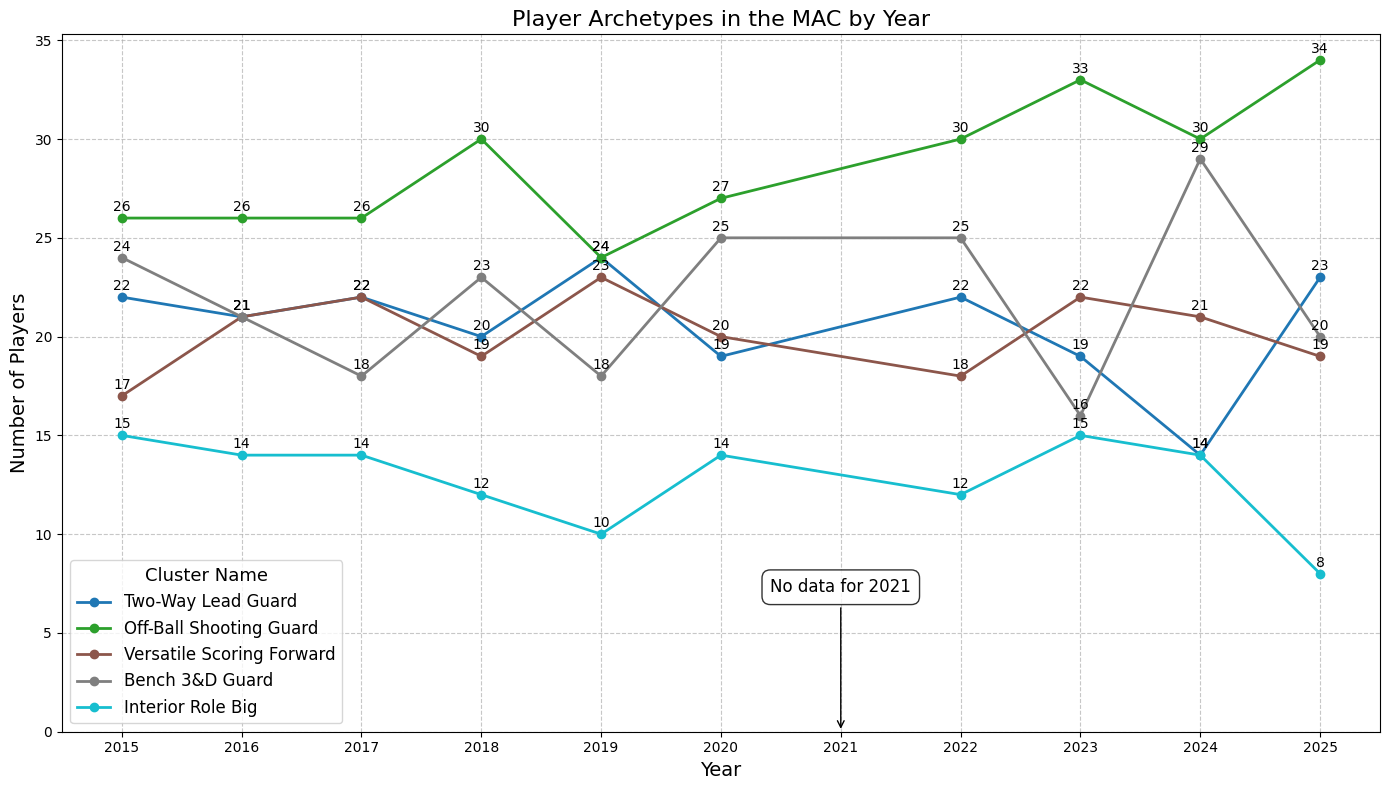

In [54]:
# Import necessary libraries to generate time series
import matplotlib.pyplot as plt
import numpy as np

# First, make sure we have the year_date column from previous steps
data['year_str'] = data['Season'].str.split('/').str[1]
data['year_str'] = data['year_str'].apply(lambda x: '20' + x)
data['year_date'] = pd.to_datetime(data['year_str'] + '-01-01')

# Extract year for grouping
data['year'] = data['year_date'].dt.year

# Get all unique years and clusters
all_years = sorted(data['year'].unique())
all_clusters = data['Cluster_Name'].unique()

# Group and count
cluster_counts = data.groupby(['year', 'Cluster_Name']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(14, 8))

# Create a color map for the clusters
colors = plt.cm.tab10(np.linspace(0, 1, len(all_clusters)))
color_dict = dict(zip(all_clusters, colors))

# Plot each cluster as a separate line
for i, cluster in enumerate(all_clusters):
    # Filter data for this cluster
    cluster_data = cluster_counts[cluster_counts['Cluster_Name'] == cluster]

    # Sort by year to ensure proper line plotting
    cluster_data = cluster_data.sort_values('year')

    # Plot the line - this will naturally skip 2021 since it's not in the data
    plt.plot(
        cluster_data['year'],
        cluster_data['count'],
        marker='o',
        linewidth=2,
        label=cluster,
        color=color_dict[cluster]
    )

    # Add data point annotations if desired
    for x, y in zip(cluster_data['year'], cluster_data['count']):
        plt.annotate(
            f'{int(y)}',
            (x, y),
            textcoords="offset points",
            xytext=(0, 5),
            ha='center'
        )

# Add labels and title
plt.title('Player Archetypes in the MAC by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

# Add legend
plt.legend(title='Cluster Name', fontsize=12, title_fontsize=13)

# Format x-axis to show all years, including 2021 with no data
all_years_with_2021 = sorted(list(all_years) + [2021])
plt.xticks(all_years_with_2021)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust y-axis to start from 0
plt.ylim(bottom=0)

# Add a clear annotation about missing 2021 data
plt.annotate('No data for 2021',
             xy=(2021, 0),  # Position at 2021
             xytext=(2021, plt.ylim()[1] * 0.2),  # Text position halfway up the y-axis
             arrowprops=dict(arrowstyle='->'),
             ha='center',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### **Top Three Teams Analysis**

Perform analysis of lineup configurations for the top three teams with the best regular season records for each year in the dataset.

In [55]:
# Import data for the top three teams each season
data2 = pd.read_csv("MAC 2014-2025 Win % - Sheet1.csv")
data2

,Year,School,Wins,Loss,Win %,Off Rating,Def Rating
0,2015,Central Michigan,23.0,9.0,0.719,111.2,101.3
1,2015,Buffalo,23.0,10.0,0.697,105.6,96.6
2,2015,Kent State,23.0,12.0,0.657,102.5,97.9
3,2016,Akron,26.0,9.0,0.743,107.6,98.0
4,2016,Ohio,23.0,12.0,0.657,107.6,103.3
5,2016,Northern Illinois,21.0,13.0,0.618,104.1,97.6
6,2017,Akron,27.0,9.0,0.750,109.8,102.9
7,2017,Ohio,20.0,11.0,0.645,104.6,95.8
8,2017,Ball State,21.0,13.0,0.618,103.6,100.8
9,2018,Buffalo,27.0,9.0,0.750,111.0,100.8


#### **Clean and Format Data**

In [56]:
# Any records where the 'School' is 'Toldeo', change it to 'Toledo'
data2.loc[data2['School'] == 'Toldeo', 'School'] = 'Toledo'

# Any records wher 'School' is 'Miami', change it to 'Miami (OH)'
data2.loc[data2['School'] == 'Miami', 'School'] = 'Miami (OH)'

# Any records where 'School' is 'Bowling Green ', change it to 'Bowling Green'
data2.loc[data2['School'] == 'Bowling Green ', 'School'] = 'Bowling Green'

In [57]:
# Get all unique clusters
unique_clusters = data['Cluster_Name'].unique()

# Group by year and Team, then count occurrences of each cluster
cluster_counts = data.groupby(['year', 'Team', 'Cluster_Name']).size().reset_index(name='count')

# Pivot the data to have one column per cluster
pivot_counts = cluster_counts.pivot_table(
    index=['year', 'Team'],
    columns='Cluster_Name',
    values='count',
    fill_value=0  # Fill NaN values with 0
).reset_index()

# Rename the columns to include 'Cluster_' prefix for clarity
pivot_counts.columns.name = None  # Remove the columns name
cluster_columns = {cluster: f'Cluster_{cluster}' for cluster in unique_clusters}
pivot_counts = pivot_counts.rename(columns=cluster_columns)

# Prepare for merging by renaming columns to match data2
pivot_counts = pivot_counts.rename(columns={'year': 'Year', 'Team': 'School'})

# Merge the pivot table with data2
result = data2.merge(
    pivot_counts,
    left_on=['Year', 'School'],
    right_on=['Year', 'School'],
    how='left'  # Keep all rows from data2
)

# Fill any NaN values in the cluster columns with 0
for cluster in unique_clusters:
    cluster_col = f'Cluster_{cluster}'
    if cluster_col in result.columns:
        result[cluster_col] = result[cluster_col].fillna(0).astype(int)

# Check output
result

,Year,School,Wins,Loss,Win %,Off Rating,Def Rating,Cluster_Bench 3&D Guard,Cluster_Interior Role Big,Cluster_Off-Ball Shooting Guard,Cluster_Two-Way Lead Guard,Cluster_Versatile Scoring Forward
0,2015,Central Michigan,23.0,9.0,0.719,111.2,101.3,1,0,3,2,2
1,2015,Buffalo,23.0,10.0,0.697,105.6,96.6,2,2,1,2,1
2,2015,Kent State,23.0,12.0,0.657,102.5,97.9,2,2,3,0,1
3,2016,Akron,26.0,9.0,0.743,107.6,98.0,0,1,4,1,2
4,2016,Ohio,23.0,12.0,0.657,107.6,103.3,1,0,3,1,2
5,2016,Northern Illinois,21.0,13.0,0.618,104.1,97.6,2,1,1,2,3
6,2017,Akron,27.0,9.0,0.750,109.8,102.9,1,1,4,1,1
7,2017,Ohio,20.0,11.0,0.645,104.6,95.8,2,1,3,1,2
8,2017,Ball State,21.0,13.0,0.618,103.6,100.8,1,0,3,2,3
9,2018,Buffalo,27.0,9.0,0.750,111.0,100.8,2,1,1,3,2


#### **General Cluster Distribution**

Generate boxplots to show distributions of each cluster for only the top three teams each season.

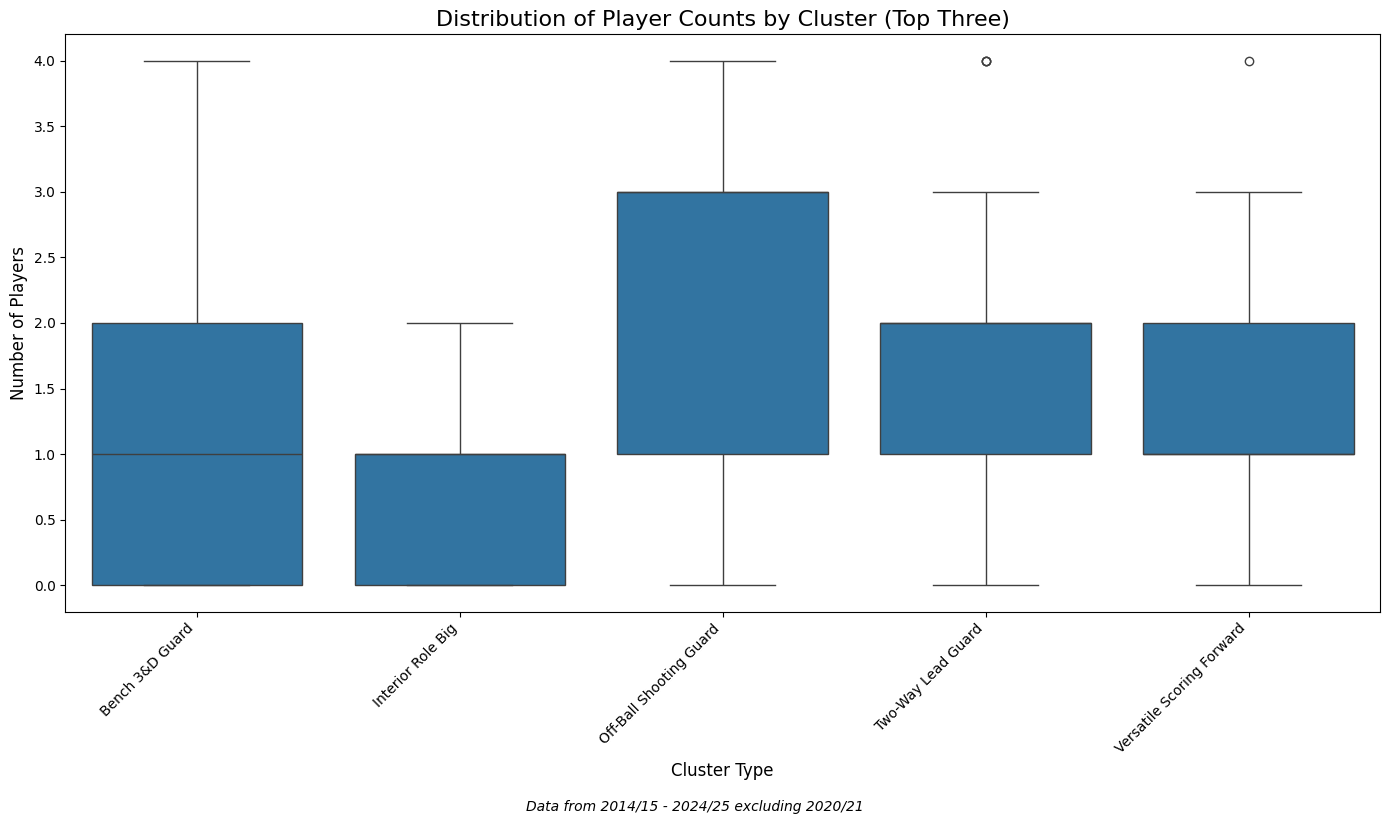

In [58]:
# Import seaborn
import seaborn as sns

# Melt the cluster columns into a long format
cluster_cols_box = [col for col in result.columns if 'Cluster_' in col]
df_melted_box = pd.melt(
    result,
    id_vars=['Year', 'School', 'Wins', 'Loss', 'Win %'],
    value_vars=cluster_cols_box,
    var_name='Cluster_Type',
    value_name='Count'
)

# Clean up the cluster type names
df_melted_box['Cluster_Type'] = df_melted_box['Cluster_Type'].str.replace('Cluster_', '')

# Generate Box Plots
plt.figure(figsize=(14, 8))
sns.boxplot(x="Cluster_Type", y="Count", data=df_melted_box)
plt.title('Distribution of Player Counts by Cluster (Top Three)', fontsize=16)
plt.xlabel('Cluster Type', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.figtext(0.5, -0.02, 'Data from 2014/15 - 2024/25 excluding 2020/21',
            wrap=True, horizontalalignment='center', fontsize=10, style='italic')
plt.show()

#### **Winning Percentage Analysis**

In [59]:
# Drop records when 'School' is 'Buffalo' and 'Year' is 2019, as it is a massive outlier in this case
result_temp = result.drop(result[(result['School'] == 'Buffalo') & (result['Year'] == 2019)].index)

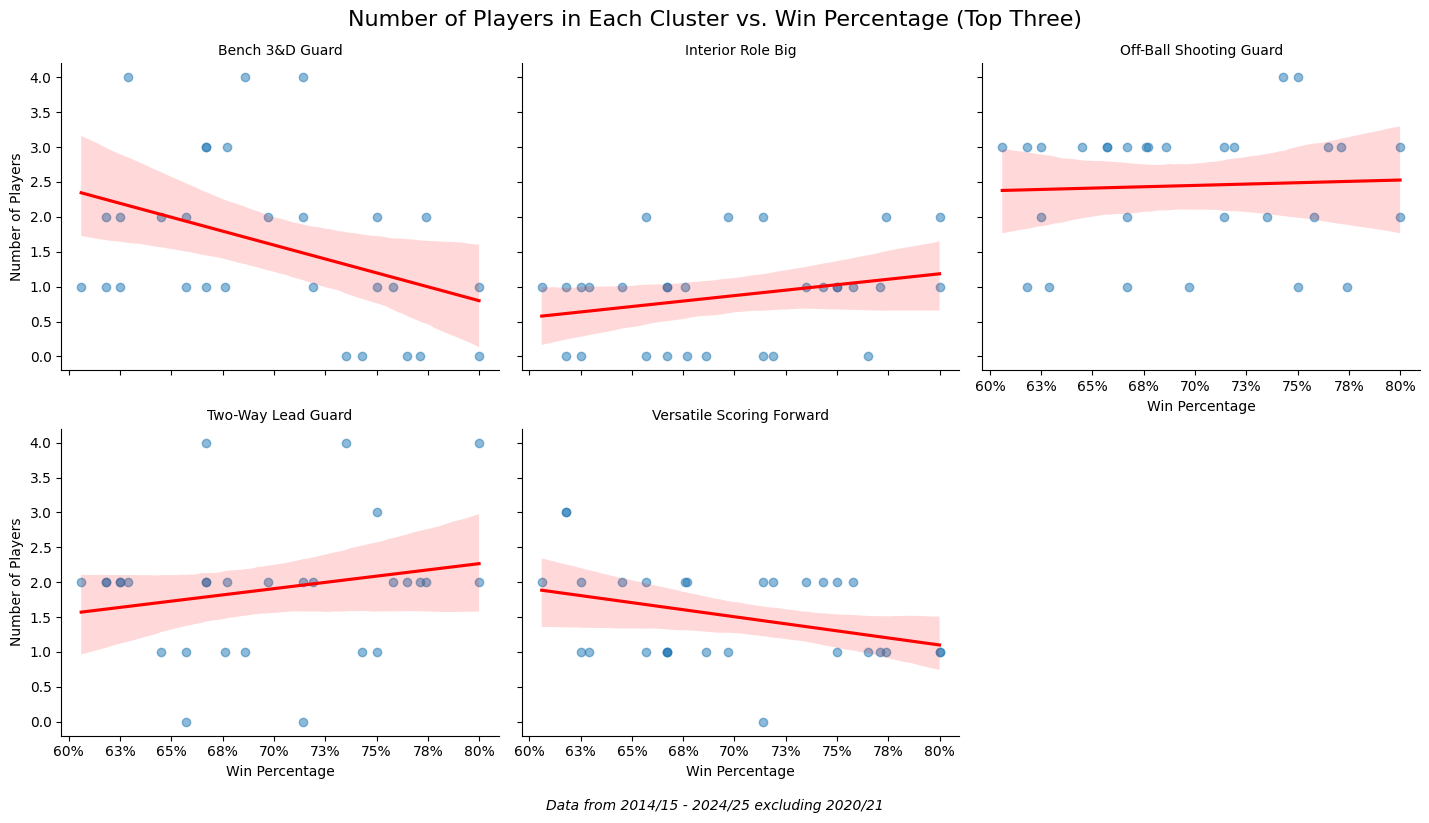

In [60]:
# Identify cluster columns
cluster_cols_win = [col for col in result_temp.columns if 'Cluster_' in col]

# Melt to long format
df_melted_win = pd.melt(
    result_temp,
    id_vars=['Year', 'School', 'Wins', 'Loss', 'Win %', 'Off Rating', 'Def Rating'],
    value_vars=cluster_cols_win,
    var_name='Cluster_Type',
    value_name='Count'
)

# Clean cluster type names
df_melted_win['Cluster_Type'] = df_melted_win['Cluster_Type'].str.replace('Cluster_', '')

# Create faceted regression plots
plot_win = sns.FacetGrid(df_melted_win, col="Cluster_Type", col_wrap=3, height=4, aspect=1.2)
plot_win.map(sns.regplot, "Win %", "Count", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Set titles and axis labels
plot_win.set_titles("{col_name}")
plot_win.set_axis_labels("Win Percentage", "Number of Players")

# Format x-axis as percentage
for ax in plot_win.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Adjust layout and add title
plt.subplots_adjust(top=0.9)
plot_win.fig.suptitle('Number of Players in Each Cluster vs. Win Percentage (Top Three)', fontsize=16)
plt.tight_layout()
plt.figtext(0.5, -0.02, 'Data from 2014/15 - 2024/25 excluding 2020/21',
            wrap=True, horizontalalignment='center', fontsize=10, style='italic')
plt.show()

#### **Offensive Rating**

Offensive ratings were pulled from *TeamRankings.com* and then scaled to 100 for easier comprehension.

In [61]:
# 2023 Toledo was eliminated due to it being a massive outlier in this case
result_temp2 = result.drop(result[(result['School'] == 'Toledo') & (result['Year'] == 2023)].index)

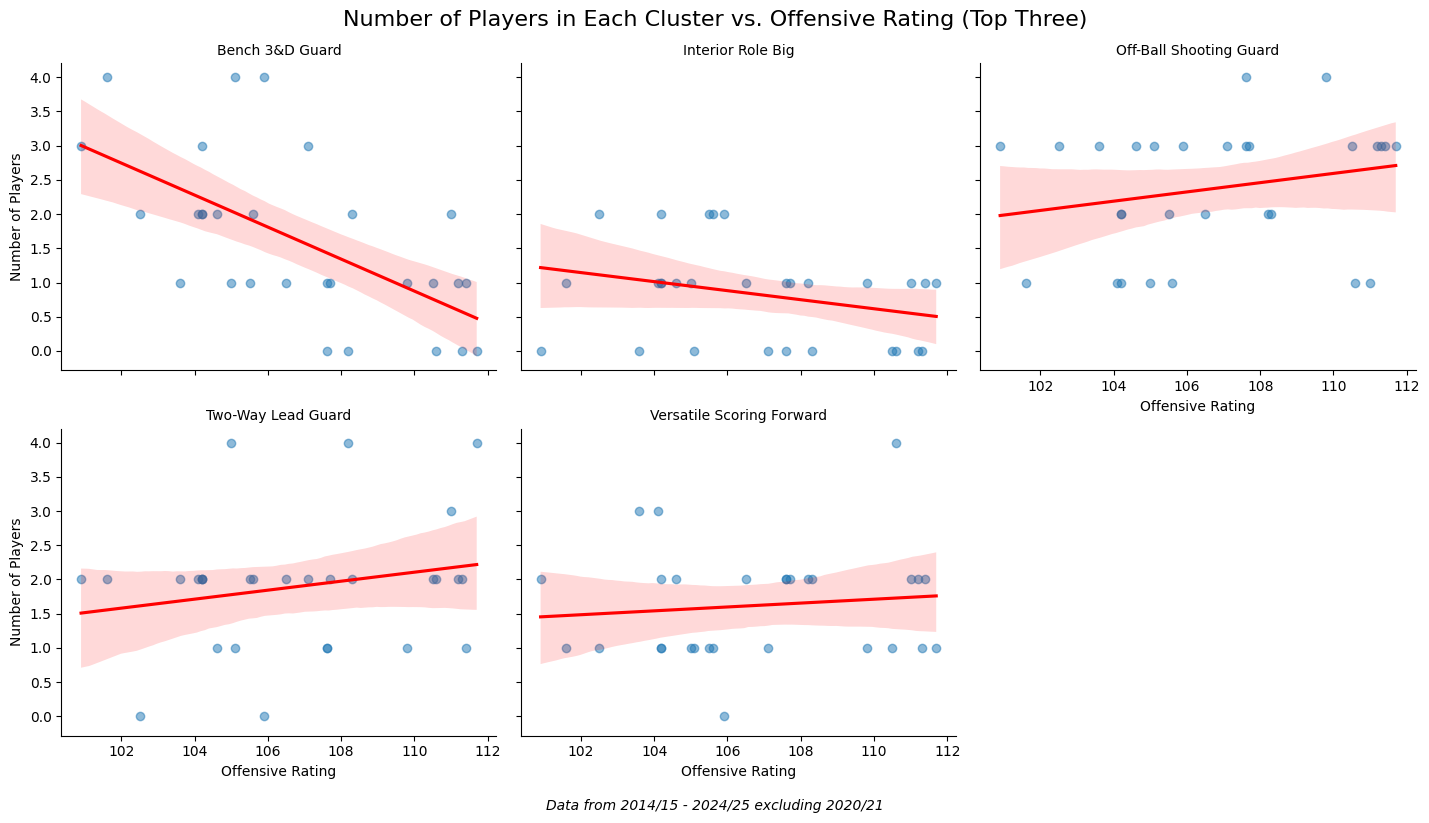

In [62]:
# Identify cluster columns
cluster_cols_off = [col for col in result_temp2.columns if 'Cluster_' in col]

# Melt to long format
df_melted_off = pd.melt(
    result_temp2,
    id_vars=['Year', 'School', 'Wins', 'Loss', 'Win %', 'Off Rating', 'Def Rating'],
    value_vars=cluster_cols_off,
    var_name='Cluster_Type',
    value_name='Count'
)

# Clean cluster type names
df_melted_off['Cluster_Type'] = df_melted_off['Cluster_Type'].str.replace('Cluster_', '')

# Create faceted regression plots
plot_off = sns.FacetGrid(df_melted_off, col="Cluster_Type", col_wrap=3, height=4, aspect=1.2)
plot_off.map(sns.regplot, "Off Rating", "Count", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Set titles and axis labels
plot_off.set_titles("{col_name}")
plot_off.set_axis_labels("Offensive Rating", "Number of Players")

# Adjust layout and add title
plt.subplots_adjust(top=0.9)
plot_off.fig.suptitle('Number of Players in Each Cluster vs. Offensive Rating (Top Three)', fontsize=16)
plt.tight_layout()
plt.figtext(0.5, -0.02, 'Data from 2014/15 - 2024/25 excluding 2020/21',
            wrap=True, horizontalalignment='center', fontsize=10, style='italic')
plt.show()

#### **Defensive Rating**

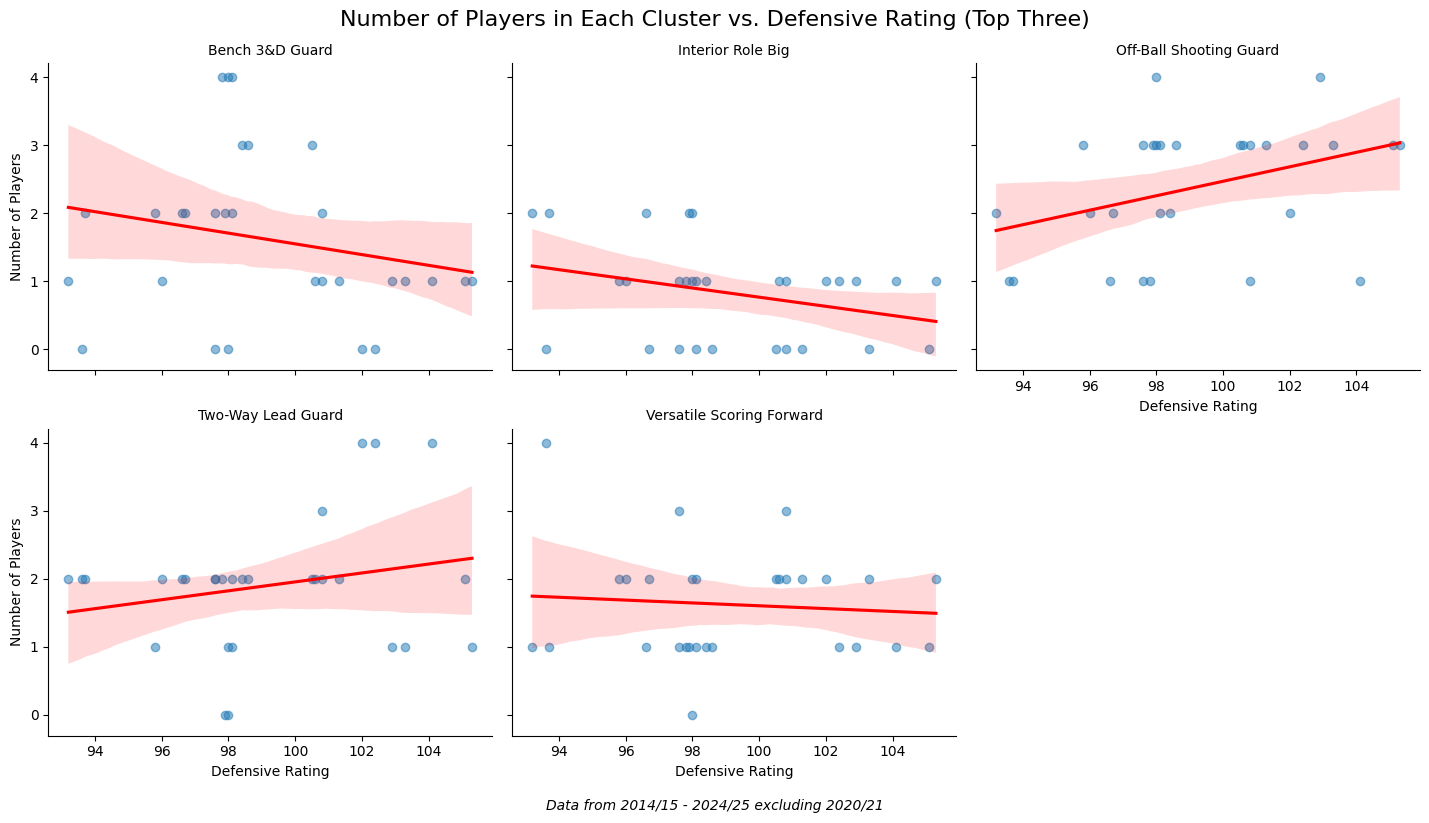

In [63]:
# Identify cluster columns
cluster_cols_def = [col for col in result.columns if 'Cluster_' in col]

# Melt to long format
df_melted_def = pd.melt(
    result_temp2,
    id_vars=['Year', 'School', 'Wins', 'Loss', 'Win %', 'Off Rating', 'Def Rating'],
    value_vars=cluster_cols_def,
    var_name='Cluster_Type',
    value_name='Count'
)

# Clean cluster type names
df_melted_def['Cluster_Type'] = df_melted_def['Cluster_Type'].str.replace('Cluster_', '')

# Create faceted regression plots
plot_def = sns.FacetGrid(df_melted_def, col="Cluster_Type", col_wrap=3, height=4, aspect=1.2)
plot_def.map(sns.regplot, "Def Rating", "Count", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Set titles and axis labels
plot_def.set_titles("{col_name}")
plot_def.set_axis_labels("Defensive Rating", "Number of Players")

# Adjust layout and add title
plt.subplots_adjust(top=0.9)
plot_def.fig.suptitle('Number of Players in Each Cluster vs. Defensive Rating (Top Three)', fontsize=16)
plt.tight_layout()
plt.figtext(0.5, -0.02, 'Data from 2014/15 - 2024/25 excluding 2020/21',
            wrap=True, horizontalalignment='center', fontsize=10, style='italic')
plt.show()

## **Miami Analysis**

Perform an analysis specific to Miami since the most recent coach was hired previous to the 2022/23 season to draw conclusions about coaching strategies related to roster construction.

#### **Data Cleaning and Formatting**

In [64]:
# Filter 'data' so that there are only records when Year >=2023 and Team == 'Miami (OH)'
list_years = ['2022/23', '2023/24', '2024/25']

filtered_data_mu = data[(data['Season'].isin(list_years)) & (data['Team'] == 'Miami (OH)')]
filtered_data_mu

,Season,Player,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRBPerMin,ASTPerMin,STLPerMin,BLKPerMin,PtsPerMin,Cluster,Cluster_Name,year_str,year_date,year
20,2024/25,peter suder,Miami (OH),G,34,34,29.7,4.9,9.8,0.497,...,0.165,0.128,0.044,0.013,0.461,5,Two-Way Lead Guard,2025,2025-01-01,2025
21,2024/25,kam craft,Miami (OH),G,34,34,25.7,5.0,11.2,0.446,...,0.117,0.039,0.016,0.008,0.529,4,Off-Ball Shooting Guard,2025,2025-01-01,2025
37,2024/25,eian elmer,Miami (OH),F,33,32,27.4,4.1,8.6,0.473,...,0.179,0.044,0.055,0.026,0.401,3,Versatile Scoring Forward,2025,2025-01-01,2025
47,2024/25,brant byers,Miami (OH),F,34,1,17.6,2.8,5.7,0.495,...,0.159,0.028,0.034,0.023,0.477,4,Off-Ball Shooting Guard,2025,2025-01-01,2025
53,2024/25,antwone woolfolk,Miami (OH),F,34,34,21.6,3.3,5.4,0.617,...,0.250,0.056,0.051,0.042,0.356,2,Interior Role Big,2025,2025-01-01,2025
66,2024/25,evan ipsaro,Miami (OH),G,34,0,20.1,2.0,3.8,0.523,...,0.090,0.144,0.045,0.005,0.343,5,Two-Way Lead Guard,2025,2025-01-01,2025
71,2024/25,reece potter,Miami (OH),C,30,0,17.0,2.5,5.4,0.466,...,0.218,0.071,0.024,0.041,0.382,3,Versatile Scoring Forward,2025,2025-01-01,2025
73,2024/25,mekhi cooper,Miami (OH),G,34,34,23.6,1.9,5.0,0.374,...,0.106,0.114,0.051,0.000,0.246,5,Two-Way Lead Guard,2025,2025-01-01,2025
80,2024/25,luke skaljac,Miami (OH),G,32,0,13.9,2.0,4.0,0.496,...,0.094,0.108,0.043,0.007,0.388,5,Two-Way Lead Guard,2025,2025-01-01,2025
126,2023/24,anderson mirambeaux,Miami (OH),F,23,8,21.0,4.8,9.8,0.487,...,0.162,0.086,0.024,0.029,0.605,3,Versatile Scoring Forward,2024,2024-01-01,2024


In [65]:
# Group and count players by cluster and year
cluster_counts = filtered_data_mu.groupby(['year', 'Cluster', 'Cluster_Name'])['Player'].count().reset_index()
cluster_counts.rename(columns={'Player': 'player_count'}, inplace=True)

# Get all unique years and clusters
all_years = cluster_counts['year'].unique()
all_clusters = cluster_counts[['Cluster', 'Cluster_Name']].drop_duplicates()

# Cartesian product of years × clusters
full_index = pd.MultiIndex.from_product(
    [all_years, all_clusters.itertuples(index=False)],
    names=['year', 'cluster_info']
)
full_df = pd.DataFrame(index=full_index).reset_index()
full_df[['Cluster', 'Cluster_Name']] = pd.DataFrame(full_df['cluster_info'].tolist(), index=full_df.index)
full_df.drop(columns='cluster_info', inplace=True)

# Merge and fill missing counts
cluster_counts_full = pd.merge(
    full_df,
    cluster_counts,
    on=['year', 'Cluster', 'Cluster_Name'],
    how='left'
)
cluster_counts_full['player_count'] = cluster_counts_full['player_count'].fillna(0)

# Add win % directly
win_pct_map = {2025: 0.778, 2024: 0.5, 2023: 0.333}
cluster_counts_full['win_pct'] = cluster_counts_full['year'].map(win_pct_map)
cluster_counts_full

,year,Cluster,Cluster_Name,player_count,win_pct
0,2023,1,Bench 3&D Guard,2.0,0.333
1,2023,2,Interior Role Big,1.0,0.333
2,2023,3,Versatile Scoring Forward,1.0,0.333
3,2023,4,Off-Ball Shooting Guard,5.0,0.333
4,2023,5,Two-Way Lead Guard,1.0,0.333
5,2024,1,Bench 3&D Guard,2.0,0.500
6,2024,2,Interior Role Big,1.0,0.500
7,2024,3,Versatile Scoring Forward,3.0,0.500
8,2024,4,Off-Ball Shooting Guard,4.0,0.500
9,2024,5,Two-Way Lead Guard,0.0,0.500


#### **Time Series Plot**

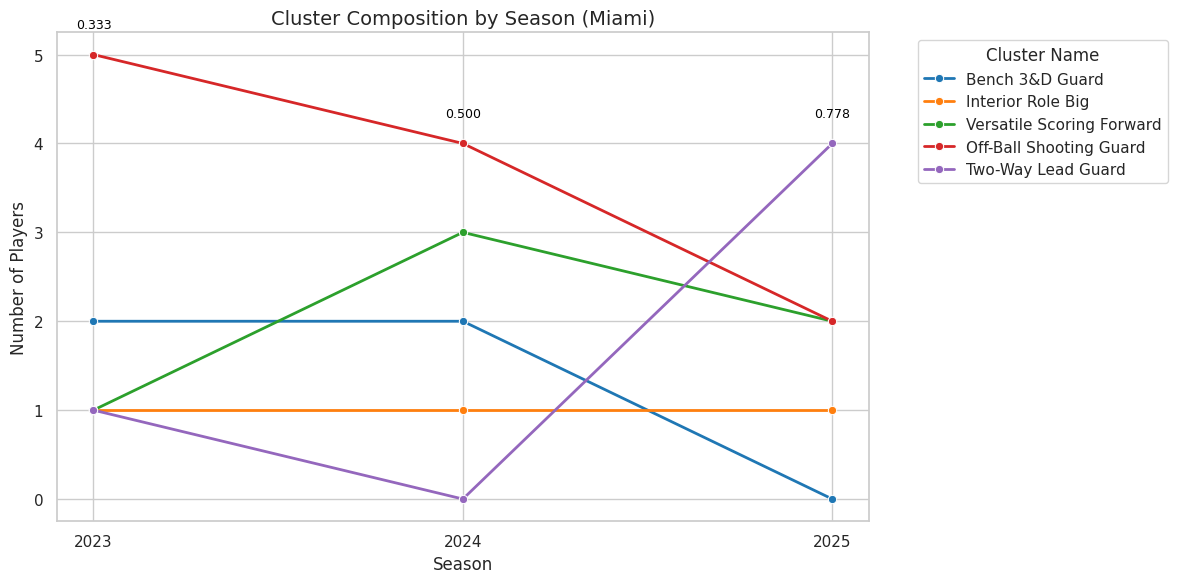

In [66]:
# Plotting time series for Miami
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(
    data=cluster_counts_full,
    x='year',
    y='player_count',
    hue='Cluster_Name',
    marker='o',
    palette='tab10',
    linewidth=2
)

# Label with win % at the highest player count per year
for year in cluster_counts_full['year'].unique():
    row = cluster_counts_full[cluster_counts_full['year'] == year].sort_values('player_count', ascending=False).iloc[0]
    plt.text(
        row['year'],
        row['player_count'] + 0.3,
        f"{row['win_pct']:.3f}",
        fontsize=9,
        ha='center',
        color='black'
    )

plt.title('Cluster Composition by Season (Miami)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend(title='Cluster Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(sorted(cluster_counts_full['year'].unique()))
plt.tight_layout()
plt.show()

#### **Last Season Roster Analysis**

In [67]:
# From 'filtered_data_mu', I need to only keep the players and their Cluster_Names when the year is '2025'
# Filter data for the year 2025 and select only the 'Player' and 'Cluster_Name' columns
filtered_2025 = filtered_data_mu[filtered_data_mu['year'] == 2025][['Player', 'Cluster_Name']]

# Display the filtered result
print(filtered_2025)

              Player               Cluster_Name
20       peter suder         Two-Way Lead Guard
21         kam craft    Off-Ball Shooting Guard
37        eian elmer  Versatile Scoring Forward
47       brant byers    Off-Ball Shooting Guard
53  antwone woolfolk          Interior Role Big
66       evan ipsaro         Two-Way Lead Guard
71      reece potter  Versatile Scoring Forward
73      mekhi cooper         Two-Way Lead Guard
80      luke skaljac         Two-Way Lead Guard


In [68]:
# Capitalize the first letter of each word in the 'Player' column
filtered_2025['Player'] = filtered_2025['Player'].str.title()

# Display the DataFrame with updated 'Player' column
pd.set_option('display.colheader_justify', 'center')  # Center column headers
pd.set_option('display.width', 1000)  # Adjust width to prevent wrapping

# Print the DataFrame without the index
print(filtered_2025.to_string(index=False))

     Player             Cluster_Name      
     Peter Suder        Two-Way Lead Guard
       Kam Craft   Off-Ball Shooting Guard
      Eian Elmer Versatile Scoring Forward
     Brant Byers   Off-Ball Shooting Guard
Antwone Woolfolk         Interior Role Big
     Evan Ipsaro        Two-Way Lead Guard
    Reece Potter Versatile Scoring Forward
    Mekhi Cooper        Two-Way Lead Guard
    Luke Skaljac        Two-Way Lead Guard


In [72]:
# Export data as a csv file
data.to_csv('player_data.csv', index=False)